# Experiment: Tau Sweep Prev Disengaged Binary Combo

**Goal**: Find best tau fit for the the combined previous disengaged which is the additive combination of counted prev trial not started or prev violation.

Related notebooks:

* `2024_02_16_EXP_tau_sweep_prev_violation.ipynb`
* `2024_03_20_tau_sweep_prev_disengaged_combo.ipynb`


**Remarks**: This doesn't seem to work that well. The Taus look quite similar to the binary combo and the weights are quite confusing due to the value of the regressor being so small when scaled.

> Written by Jess Breda 

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment

from multiglm.experiments.experiment_tau_sweep import ExperimentTauSweep

from multiglm.features.design_matrix_generator import *
from multiglm.features.design_matrix_generator_PWM import *

from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression

from multiglm.visualizations.model_visualizer import ModelVisualizerTauSweep

from multiglm.data import ANIMAL_IDS
from multiglm.experiments import STANDARD_SIGMAS


sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

In [3]:
standard_cols = {
    "session": lambda df: (copy(df.session)),
    "bias": lambda df: (add_bias_column(df)),
    "s_a": lambda df: (standardize(df.s_a)),
    "s_b": lambda df: (standardize(df.s_b)),
    "prev_avg_stim": lambda df: (prev_avg_stim(df, mask_prev_violation=True)),
    "prev_correct": lambda df: (prev_correct_side(df)),
    "prev_choice": lambda df: (prev_choice(df)),
    "labels": {"column_name": "choice"},
}

sweep_col = {
    "tau_sweep": {
        "taus": [0.51, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 100],
        "col_name": "filt_prev_disengaged",
        "col_func": lambda df: combine_two_cols(
            df.n_prev_trial_not_started,
            prev_violation(df),
            operator.add,
        ),
        "current_idx": 0,
    },
}

model_config = {
    "tau_sweep_prev_trial_not_started": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {**standard_cols, **sweep_col},
    }
}


params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": STANDARD_SIGMAS,
    "random_state": 47,
    "eval_train": True,
    "model_config": model_config,
}
save_name = "2024_03_20_tau_sweep_prev_disengaged_combo.pkl"

order = [
    "bias",
    "s_a",
    "s_b",
    "prev_avg_stim",
    "prev_correct",
    "prev_choice",
    sweep_col["tau_sweep"]["col_name"],
]

## Run

In [4]:
experiment = ExperimentTauSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']



 >>>> evaluating animal W051 sweeping taus of [0.51, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 100] <<<<

 ***** evaluating tau 0.51, sigma 0.07 *****
         Current function value: 64993.349954
         Iterations: 23
         Function evaluations: 55
         Gradient evaluations: 44

 ***** evaluating tau 0.51, sigma 0.13 *****
         Current function value: 64752.728070
         Iterations: 24
         Function evaluations: 69
         Gradient evaluations: 65

 ***** evaluating tau 0.51, sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 64663.405107
         Iterations: 26
         Function evaluations: 64
         Gradient evaluations: 63

 ***** evaluating tau 0.51, sigma 0.5 *****
Optimization terminated successfully.
         Current function value: 64590.918904
         Iterations: 25
         Function evaluations: 62
         Gradient evaluations: 61

 ***** evaluating tau 0.51, sigma 1 *****
         Current functi

## Visualize

In [5]:
# experiment = load_experiment(save_name)
mvt = ModelVisualizerTauSweep(experiment)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


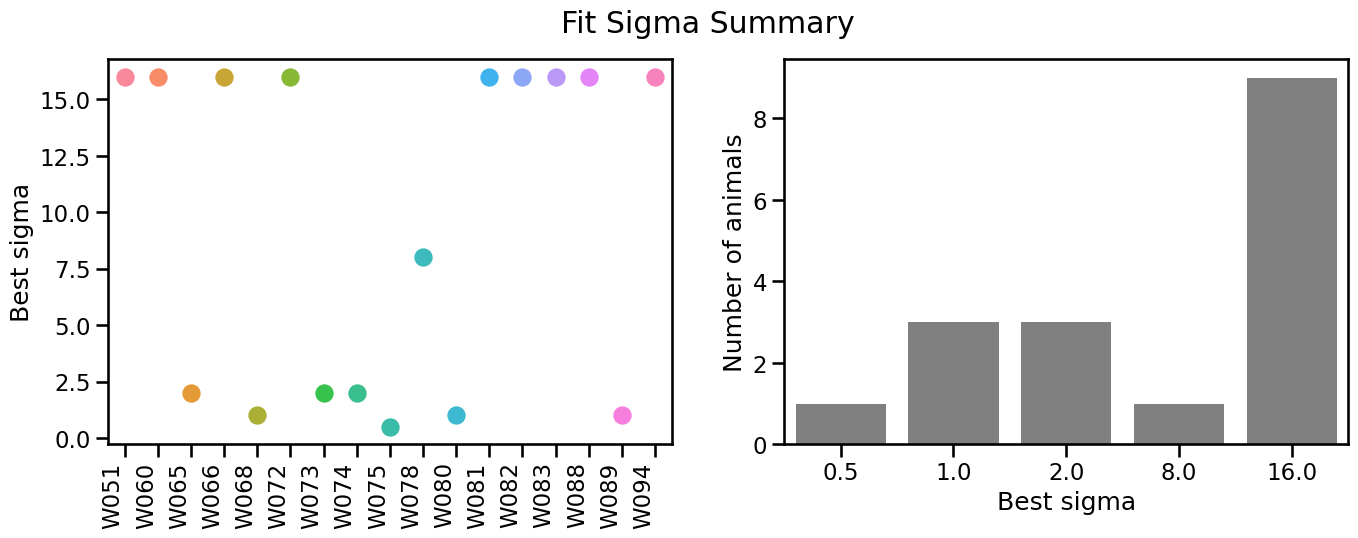

In [6]:
mvt.plot_sigma_summary()

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


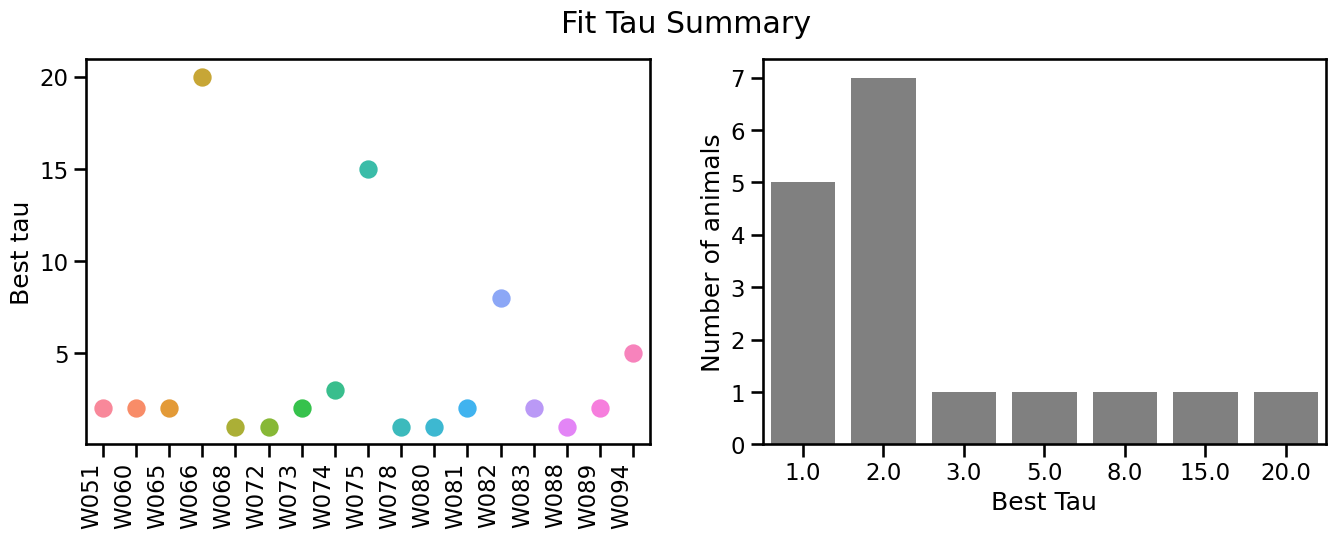

In [7]:
mvt.plot_tau_summary()

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

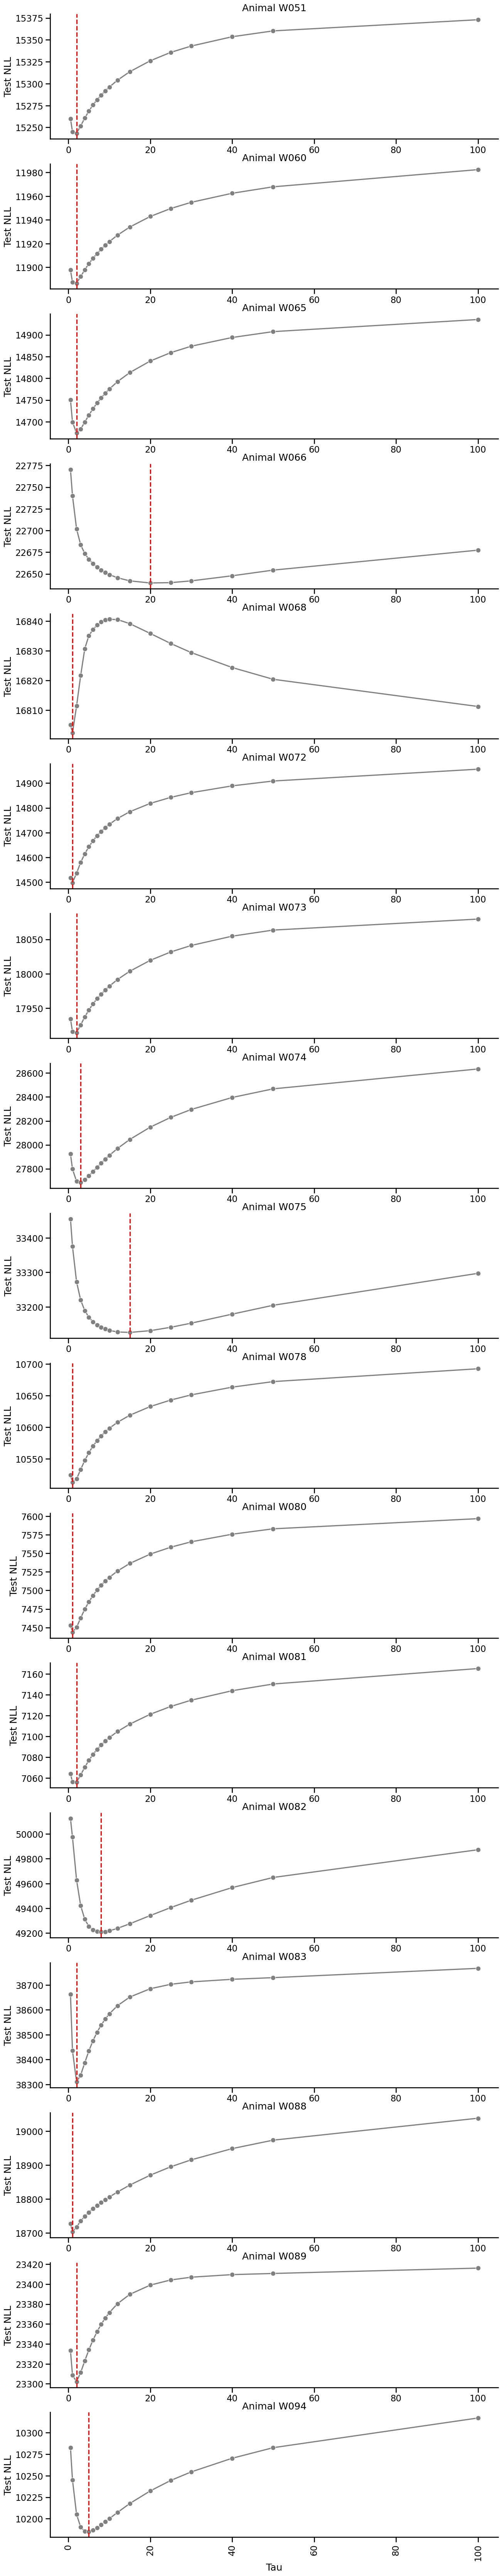

In [8]:
mvt.plot_nll_over_taus_by_animal(group="tau", color="gray")

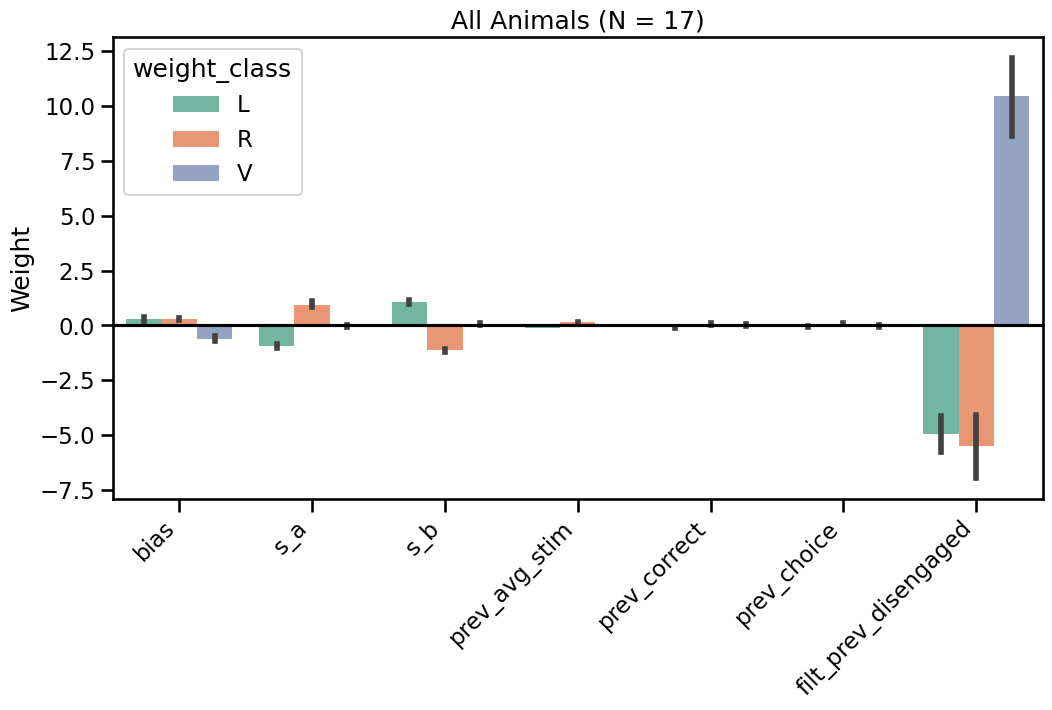

In [9]:
mvt.plot_weights_summary(palette="Set2", order=order)

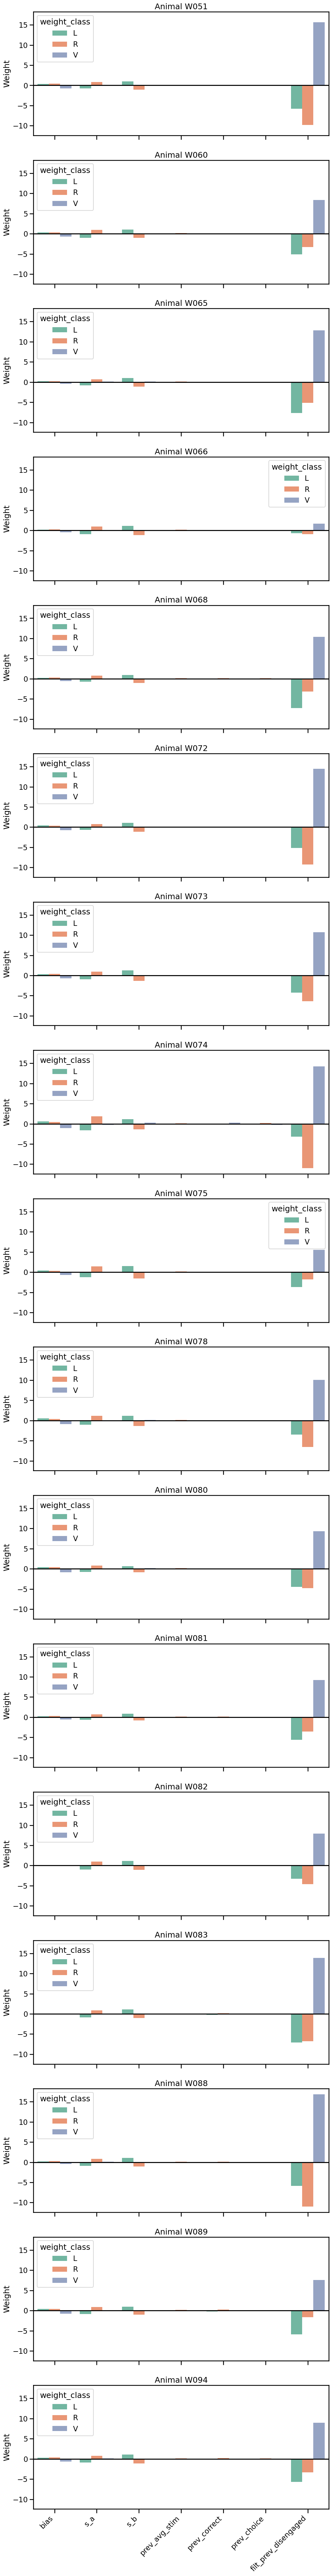

In [10]:
mvt.plot_weights_by_animal(palette="Set2", order=order)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


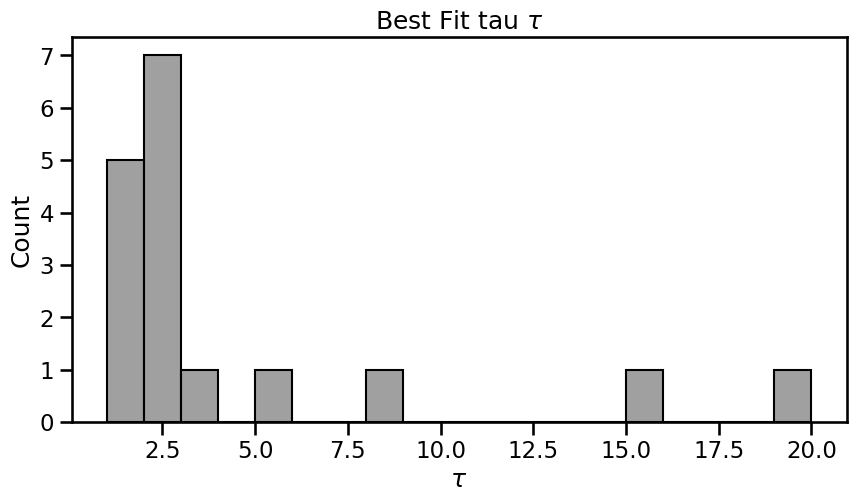

In [11]:
mvt.plot_tau_histogram(column="tau", binwidth=1)

In [12]:
# mvt.save_best_fit_tau()

## Special Fxs

In [13]:
# plot_weight_by_tau("feature_colume_name", "weight_class")